# Name: Dikshita N Padte

## Data Science and Business Analytics Internship @ The Sparks Foundation for AUG21

# Exploratory Data Analysis on Global Terrorism 




<b>Objective: </b>The objective of this task is to perform exploatory data analysis on Global Terrorism dataset and to find out the security issues and hot zones of terrorism. 

<b>Language: </b>Python

<b>About Dataset: </b>The Global Terrorism dataset contains information about different terror attack by different groups on different region,country,city ,state on different targetsand many more .

### Topic : Exploratory Data Analysis (EDA) - Terrorism 

### Dataset : globalterrorismdb_0718dist.csv [https://bit.ly/2TK5Xn5]

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
import folium
from folium.plugins import MarkerCluster

In [51]:
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,76,79,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


eventid  ...                                            related
0      197000000001  ...                                                NaN
1      197000000002  ...                                                NaN
2      197001000001  ...                                                NaN
3      197001000002  ...                                                NaN
4      197001000003  ...                                                NaN
...             ...  ...                                                ...
29970  198701150035  ...  198701150035, 198701150023, 198701150024, 1987...
29971  198701150036  ...                                                NaN
29972  198701160001  ...                                                NaN
29973  198701160002  ...                                                NaN
29974           198  ...                                                NaN

[29975 rows x 135 columns]

Understanding the data ,Data Cleaning and Data Preprocessing

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29975 entries, 0 to 29974
Columns: 135 entries, eventid to related
dtypes: float64(77), int64(1), object(57)
memory usage: 30.9+ MB


In [53]:
df.describe()

eventid         iyear  ...      INT_MISC       INT_ANY
count  2.997500e+04  29974.000000  ...  29974.000000  29974.000000
mean   1.980791e+11   1980.792086  ...      0.181290     -2.434877
std    1.214180e+09      4.065549  ...      0.764082      4.371263
min    1.980000e+02   1970.000000  ...     -9.000000     -9.000000
25%    1.979013e+11   1979.000000  ...      0.000000     -9.000000
50%    1.981121e+11   1981.000000  ...      0.000000      0.000000
75%    1.984071e+11   1984.000000  ...      0.000000      1.000000
max    1.987012e+11   1987.000000  ...      1.000000      1.000000

[8 rows x 78 columns]

In [54]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [55]:
df_corr=df.corr()
df_corr

eventid     iyear    imonth  ...  INT_IDEO  INT_MISC   INT_ANY
eventid    1.000000  0.999938 -0.016455  ...  0.042402 -0.182805 -0.039726
iyear      0.999938  1.000000 -0.024880  ...  0.042454 -0.182853 -0.039670
imonth    -0.016455 -0.024880  1.000000  ... -0.012519  0.009892 -0.012167
iday      -0.005607 -0.005934  0.020717  ... -0.007133  0.017309  0.002171
extended  -0.052749 -0.052738  0.006874  ...  0.025547  0.033039  0.030248
...             ...       ...       ...  ...       ...       ...       ...
nreleased  0.076948  0.076718  0.009635  ...  0.014963  0.001516  0.016076
INT_LOG    0.044833  0.044883 -0.012532  ...  0.993335  0.073259  0.830963
INT_IDEO   0.042402  0.042454 -0.012519  ...  1.000000  0.116887  0.835870
INT_MISC  -0.182805 -0.182853  0.009892  ...  0.116887  1.000000  0.307813
INT_ANY   -0.039726 -0.039670 -0.012167  ...  0.835870  0.307813  1.000000

[78 rows x 78 columns]

In [56]:
df_corr.isnull().sum()

eventid       4
iyear         4
imonth        5
iday          4
extended     10
             ..
nreleased    12
INT_LOG       6
INT_IDEO      4
INT_MISC      4
INT_ANY       4
Length: 78, dtype: int64

In [57]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [58]:
df_corr.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'alternative', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype2', 'attacktype3', 'targtype1',
       'targsubtype1', 'natlty1', 'targtype2', 'targsubtype2', 'natlty2',
       'targtype3', 'targsubtype3', 'natlty3', 'gsubname3', 'guncertain1',
       'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap',
       'claimed', 'claimmode', 'claim2', 'claimmode2', 'claim3', 'claimmode3',
       'compclaim', 'weaptype1', 'weapsubtype1', 'weaptype2', 'weapsubtype2',
       'weaptype3', 'weapsubtype3', 'weaptype4', 'weapsubtype4', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'propextent', 'propvalue', 'ishostkid', 'nhostkid', 'nhostkidus',
       'nhours', 'ndays', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid',
       'ransompaidus',

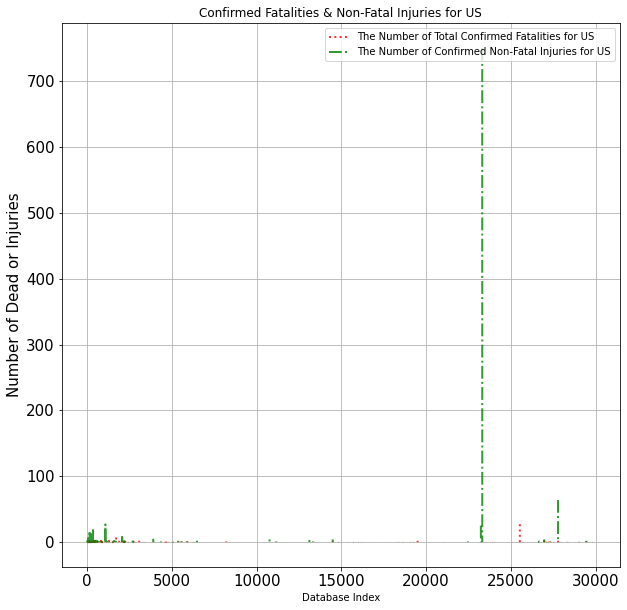

In [59]:
#US terror attack and death injuries
df.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (10,10), fontsize=15)
df.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (10,10), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            #plot title
plt.show()

Number of non-fatal injuries are more than number of deaths

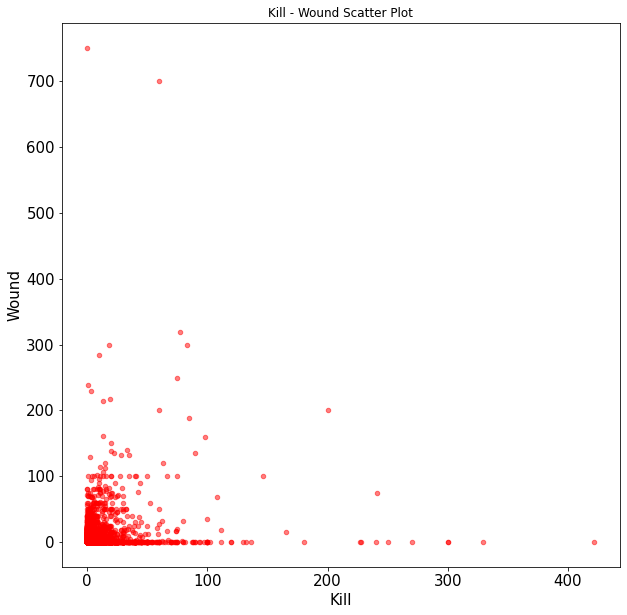

In [60]:
#death injuries at all time
df.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (10,10), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

Shows a scatter pot distribution of number of kills vs number people got wounded

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137]),
 <a list of 138 Text major ticklabel objects>)

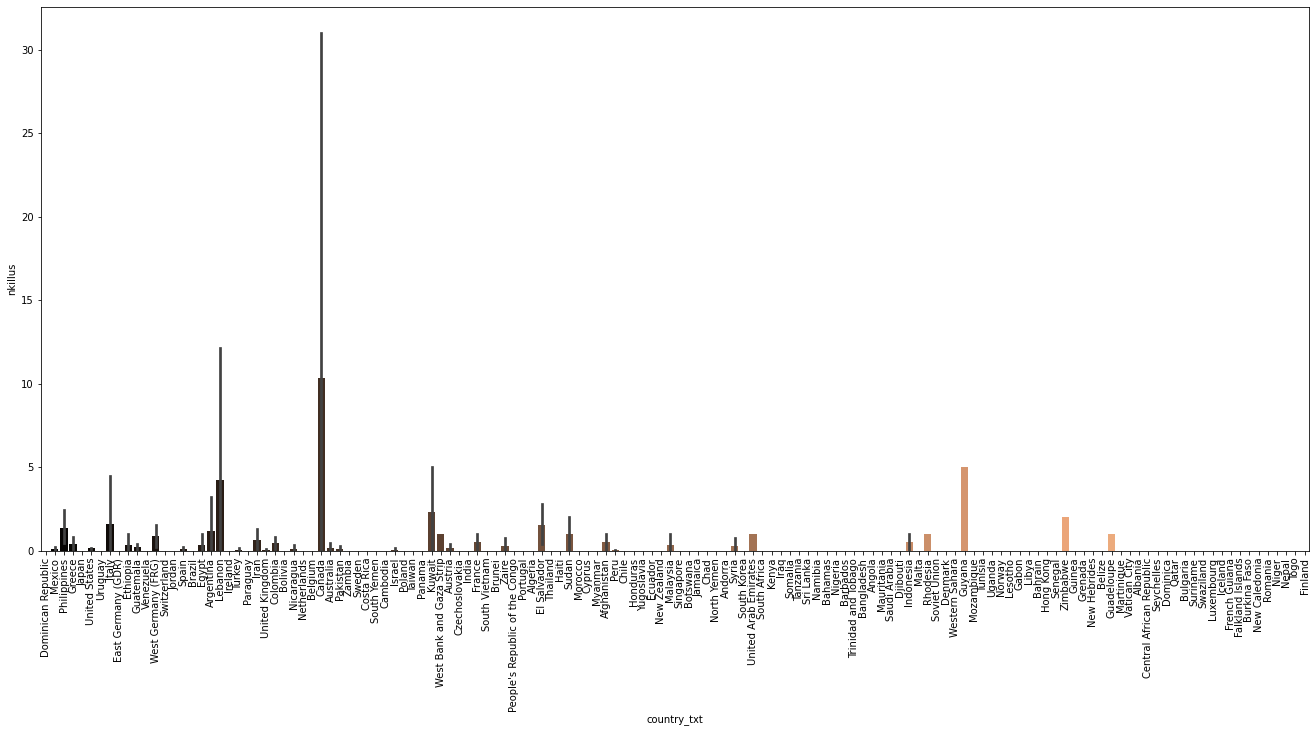

In [94]:
fig = plt.figure(figsize=(50,10)) 

ax1 = fig.add_subplot(122)
sns.barplot(df.country_txt,df.nkillus, palette='copper')
plt.xticks(rotation=90)




Shows that there were more number of deaths in Canada

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


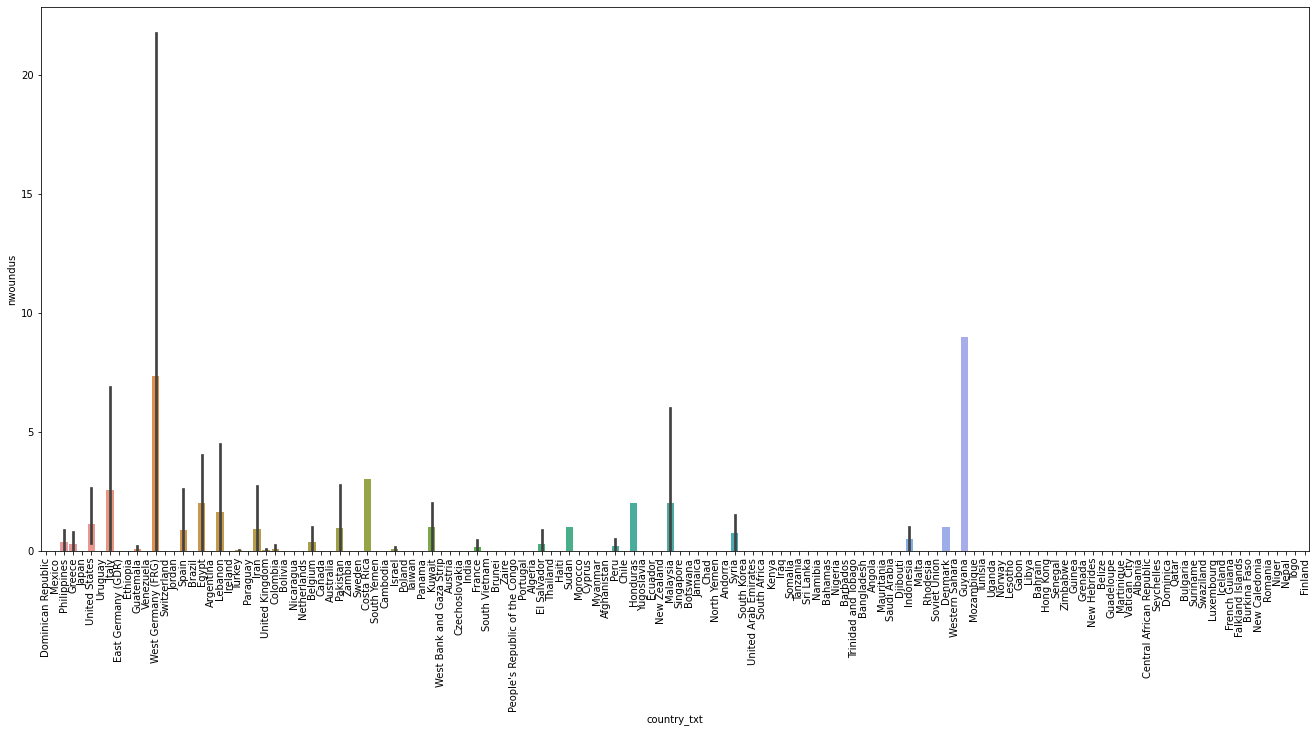

In [103]:
fig = plt.figure(figsize=(50,10)) 
ax1 = fig.add_subplot(122)
sns.barplot(df.country_txt,df.nwoundus)
plt.xticks(rotation=90)
plt.show()

 West Germany was the country in which maximum number of people got wounded

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

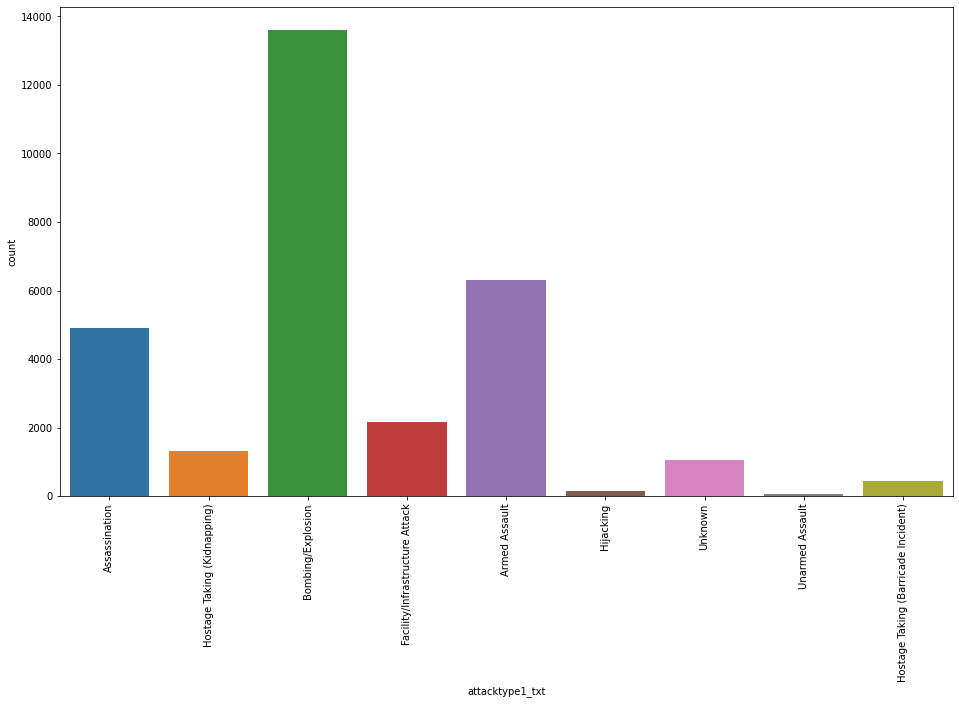

In [96]:
#Type of attack which is maximum
plt.figure(figsize=(16,9))
sns.countplot(x='attacktype1_txt',data=df)
plt.xticks(rotation=90)

Bombing explosion was the most common type of terrorist attack

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


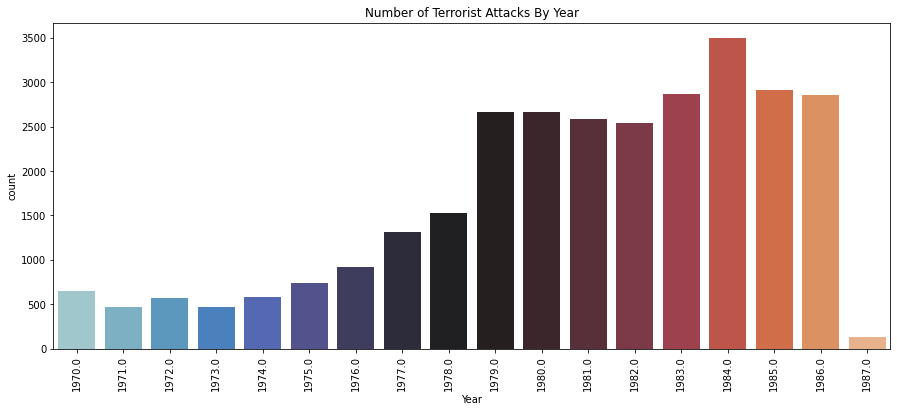

In [64]:
plt.figure(figsize=(15,6))
sns.countplot(df['iyear'],palette='icefire')
plt.xticks(rotation = 90)
plt.title('Number of Terrorist Attacks By Year');
plt.xlabel('Year')
plt.show()

1984 had highest terrorist attacks

In [65]:
df1=df[df['region'] == 10]
df1

eventid   iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
95     197002280001  1970.0     2.0  28.0  ...     -9.0       0.0    -9.0      NaN
133    197003140002  1970.0     3.0  14.0  ...     -9.0       0.0    -9.0      NaN
158    197003290002  1970.0     3.0  29.0  ...      1.0       1.0     1.0      NaN
195    197004150001  1970.0     4.0  15.0  ...      1.0       1.0     1.0      NaN
226    197004250001  1970.0     4.0  25.0  ...      0.0       1.0     1.0      NaN
...             ...     ...     ...   ...  ...      ...       ...     ...      ...
29845  198612310006  1986.0    12.0  31.0  ...      1.0      -9.0     1.0      NaN
29852  198701020002  1987.0     1.0   2.0  ...      1.0       1.0     1.0      NaN
29869  198701050001  1987.0     1.0   5.0  ...      0.0       0.0     0.0      NaN
29888  198701070008  1987.0     1.0   7.0  ...     -9.0       0.0    -9.0      NaN
29931  198701130004  1987.0     1.0  13.0  ...     -9.0       1.0     1.0      NaN

[3065 rows x 135 columns]

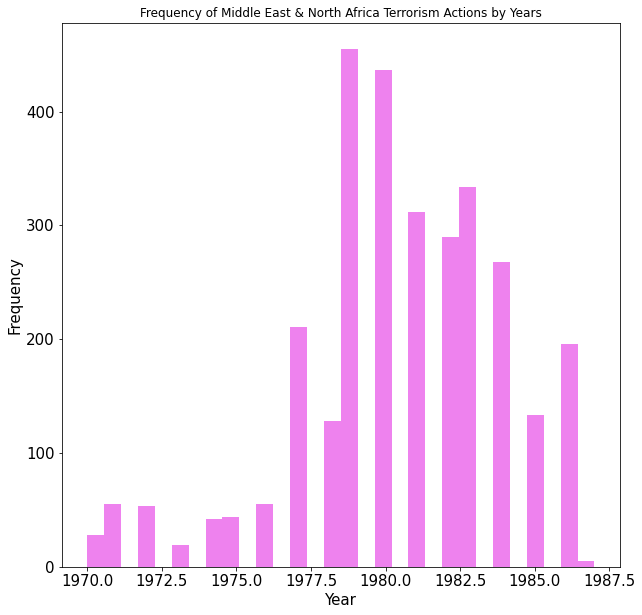

In [104]:
#Frequency of attacks in middle east and North Africa in years
df1=df[df['region'] == 10]
df1.iyear.plot(kind = 'hist', bins = 30, figsize = (10,10),color='Violet', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()



```
# This is formatted as code
```

Terrorist attack was highest between 1975 to 1980


Text(0, 0.5, 'Casualities')

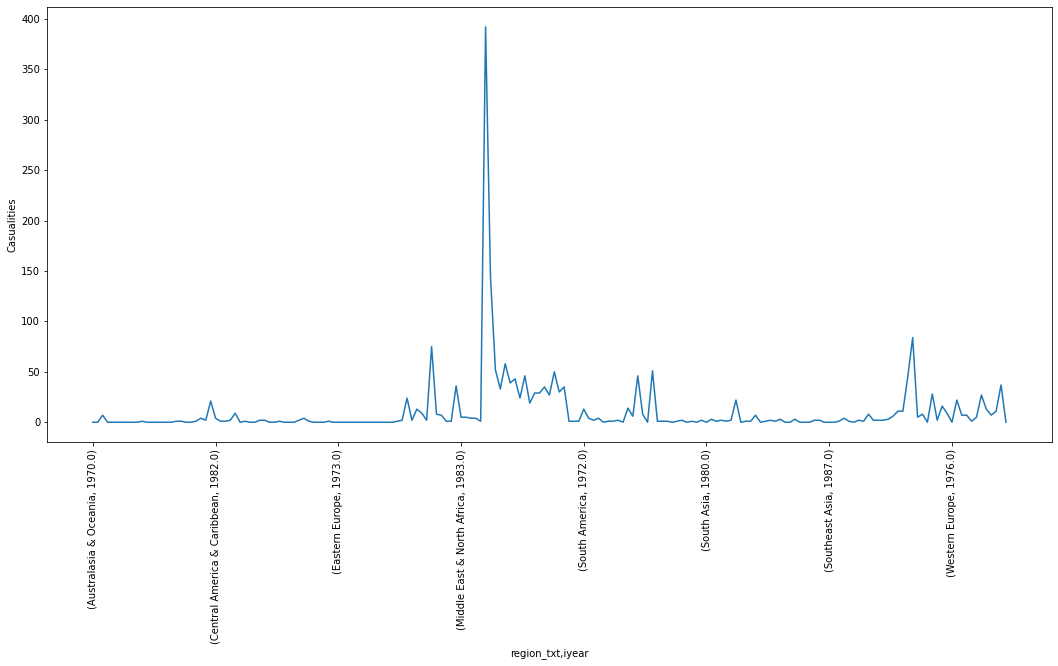

In [67]:
plt.subplots(figsize=(18,8))
df.groupby(['region_txt', 'iyear']).count()['nkillus'].plot()
plt.xticks(rotation=90)
plt.ylabel("Casualities")

Middle east and North Africa hd highest casualities in the 1983

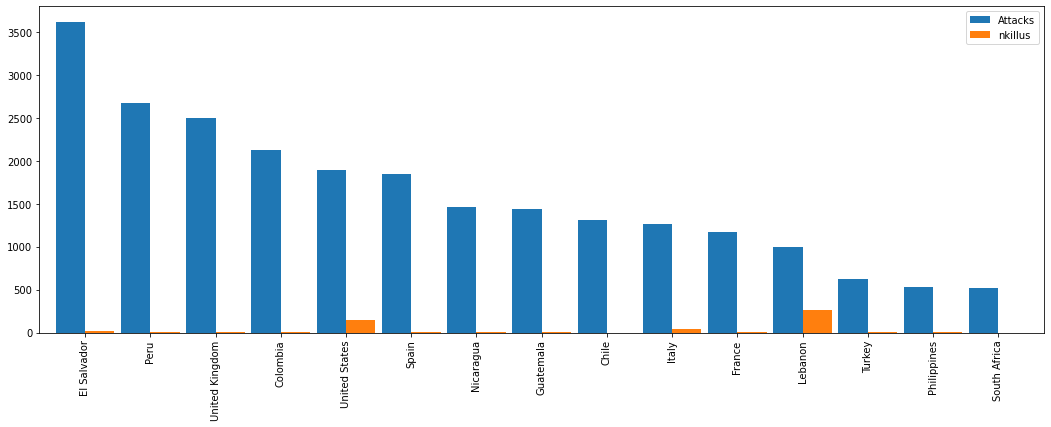

In [68]:
count=df['country_txt'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=df.groupby('country_txt')['nkillus'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

More number of people were killed in El Salvador and Peru

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


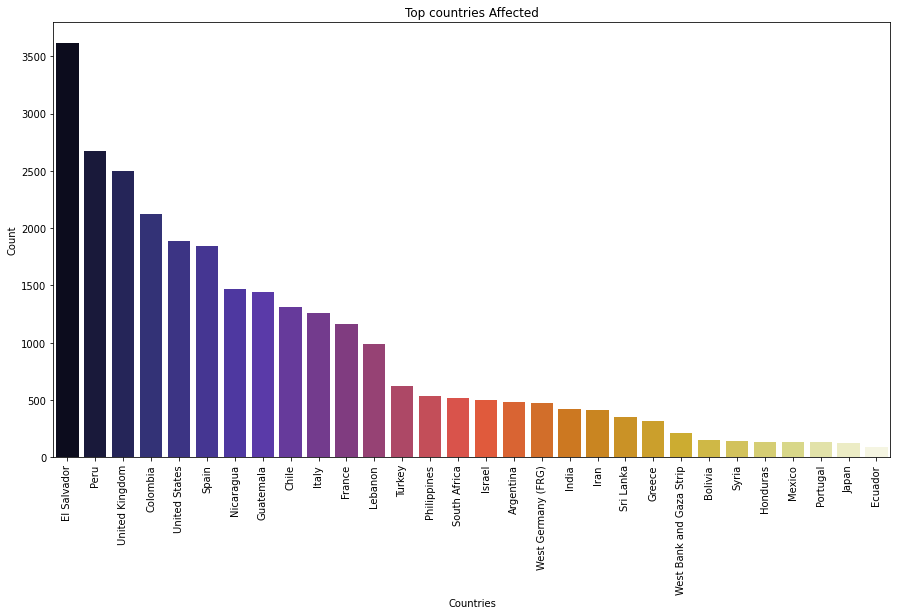

In [69]:
plt.subplots(figsize=(15,8))
sns.barplot(df['country_txt'].value_counts()[:30].index,df['country_txt'].value_counts()[:30].values,palette='CMRmap')
plt.title('Top countries Affected')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()


This graph shows that El Salvador and Peru are the highly affected countries due to terrorism

In [70]:
killData = df.loc[:,'nkill']
killData

0        1.0
1        0.0
2        1.0
3        NaN
4        NaN
        ... 
29970    0.0
29971    1.0
29972    0.0
29973    0.0
29974    NaN
Name: nkill, Length: 29975, dtype: float64

In [71]:

print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 53646


In [72]:
attackData = df.loc[:,'attacktype1':'attacktype1_txt']
attackData

attacktype1                 attacktype1_txt
0              1.0                   Assassination
1              6.0     Hostage Taking (Kidnapping)
2              1.0                   Assassination
3              3.0               Bombing/Explosion
4              7.0  Facility/Infrastructure Attack
...            ...                             ...
29970          3.0               Bombing/Explosion
29971          3.0               Bombing/Explosion
29972          9.0                         Unknown
29973          2.0                   Armed Assault
29974          NaN                             NaN

[29975 rows x 2 columns]

In [73]:

# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData

attacktype1                 attacktype1_txt  nkill
0              1.0                   Assassination    1.0
1              6.0     Hostage Taking (Kidnapping)    0.0
2              1.0                   Assassination    1.0
3              3.0               Bombing/Explosion    NaN
4              7.0  Facility/Infrastructure Attack    NaN
...            ...                             ...    ...
29970          3.0               Bombing/Explosion    0.0
29971          3.0               Bombing/Explosion    1.0
29972          9.0                         Unknown    0.0
29973          2.0                   Armed Assault    0.0
29974          NaN                             NaN    NaN

[29975 rows x 3 columns]

In [74]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt  Armed Assault  Assassination  ...  Unarmed Assault  Unknown
nkill                  30020.0         5769.0  ...             27.0   3922.0

[1 rows x 9 columns]

In [75]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


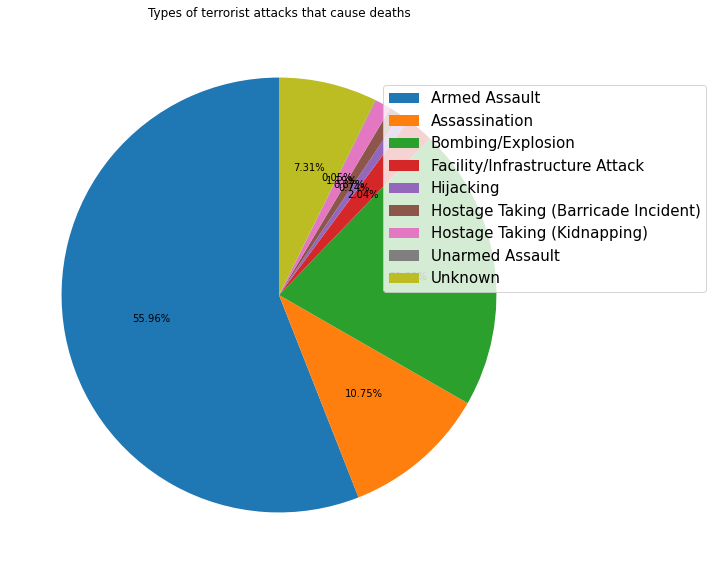

In [102]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

>Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This is how dangerous weapons and explosives are to the world.

In [77]:

countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt  Afghanistan  Albania  Algeria  ...  Zaire  Zambia  Zimbabwe
nkill               53.0      0.0      0.0  ...    3.0     7.0      69.0

[1 rows x 138 columns]

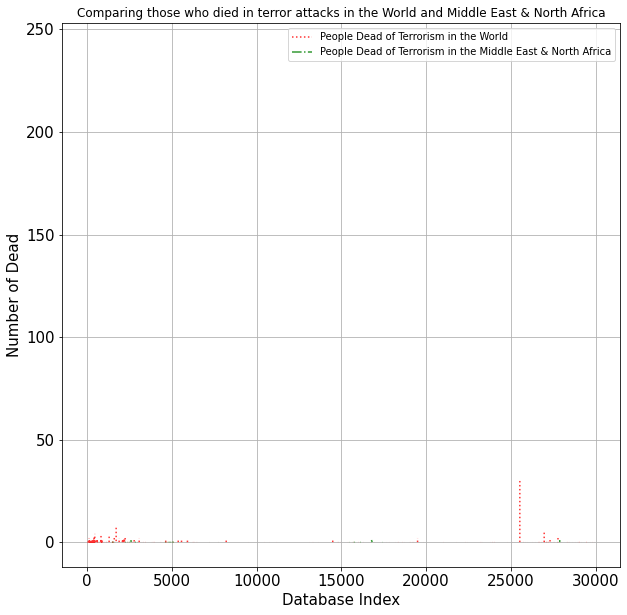

In [101]:
#Comparison of number of deaths in the world vs Middle east and north africa
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
df1.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (10,10), fontsize=15)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=15)              # label = name of label
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            #plot title
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


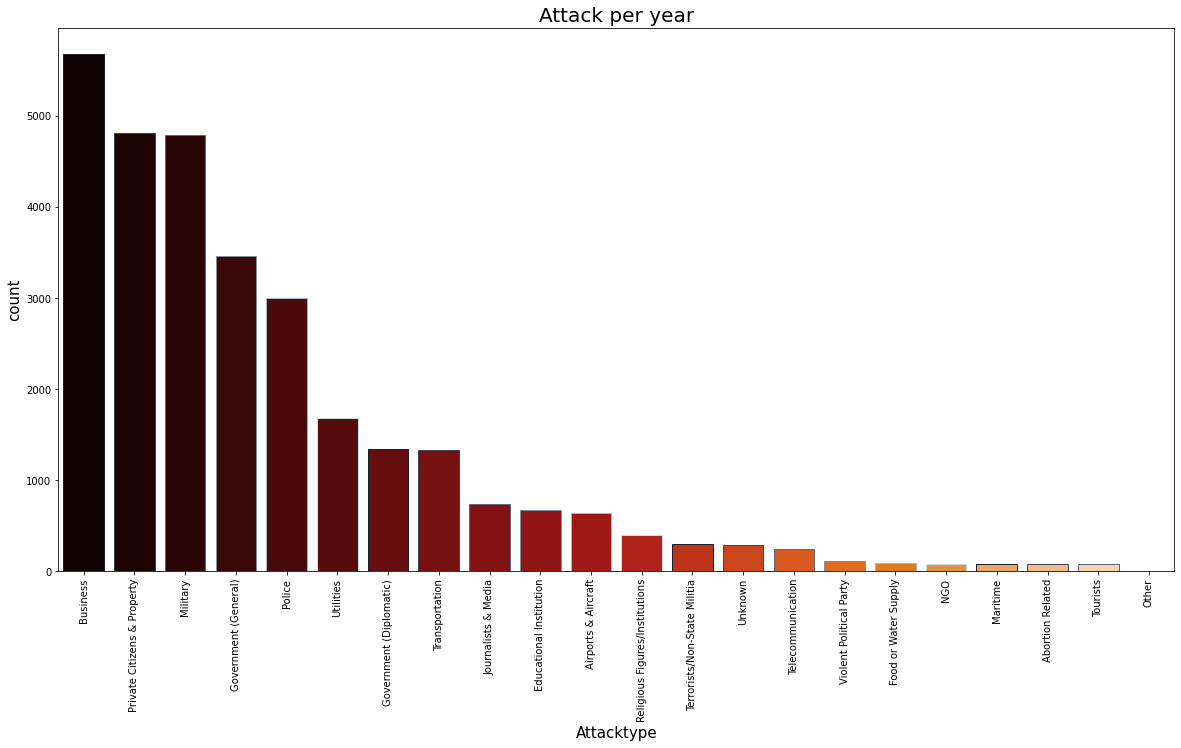

In [79]:
plt.subplots(figsize=(20,10))
sns.countplot(df["targtype1_txt"],order=df['targtype1_txt'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("bone"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

Bussiness property is attacked the most

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


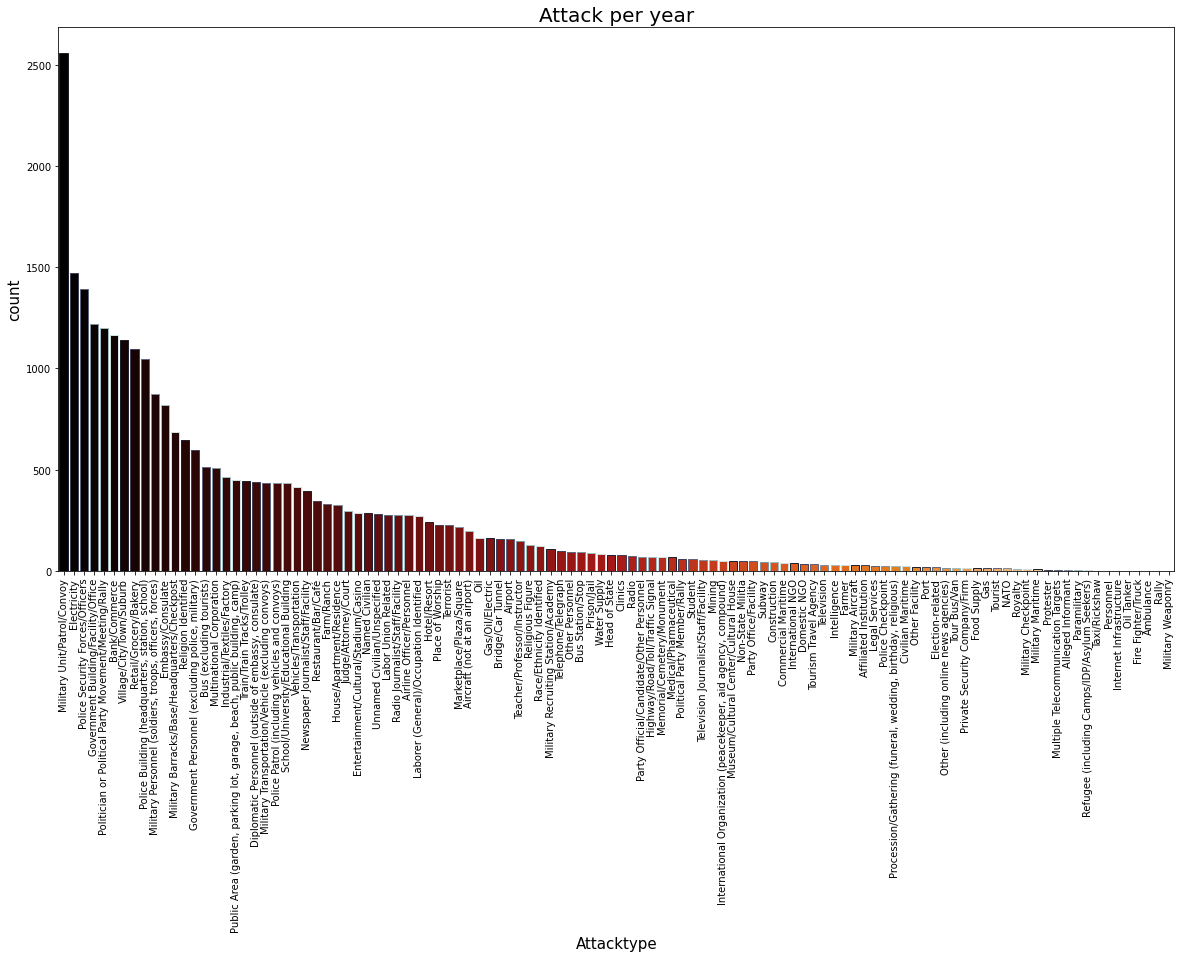

In [80]:
plt.subplots(figsize=(20,10))
sns.countplot(df["targsubtype1_txt"],order=df['targsubtype1_txt'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("bone"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

Military Unit/Convoy/Patrol target subtypes were highly attacked

```
# This is formatted as code
```



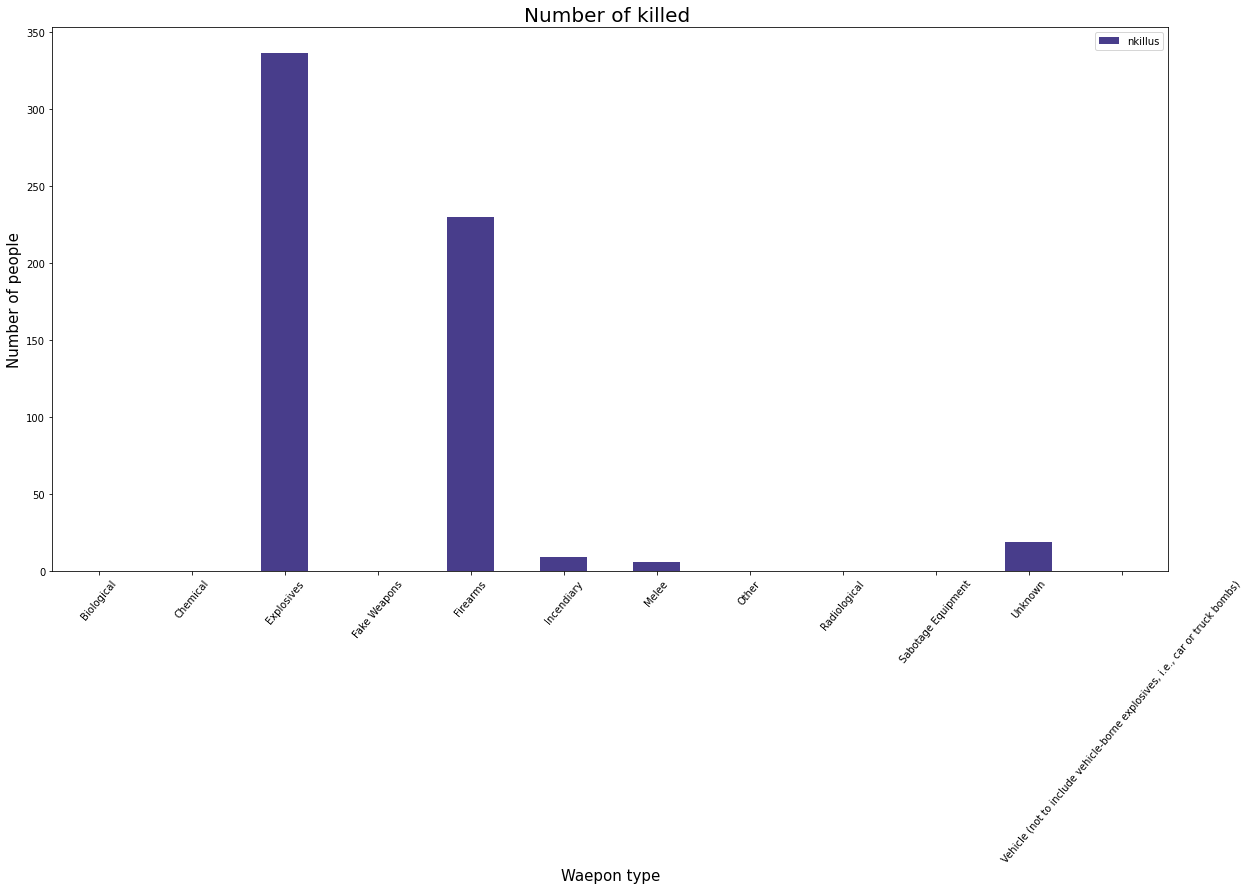

In [81]:
df[['weaptype1_txt','nkillus']].groupby(["weaptype1_txt"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Waepon type',fontsize=15)
plt.show()

Explosives and Firearms were highly used for attacking people

In [100]:
df[['weapdetail','nkillus']].groupby(["weapdetail"],axis=0).sum().plot(kind='bar',figsize=(700,100),color=['Cyan'])
plt.xticks(rotation=90)
plt.title("Number of killed ",fontsize=10)
plt.ylabel('Number of people',fontsize=10)
plt.xlabel('Detailed Weapon used type',fontsize=5)
plt.show()

Automatic firearms ,grenades and incendiary was the most used weapon

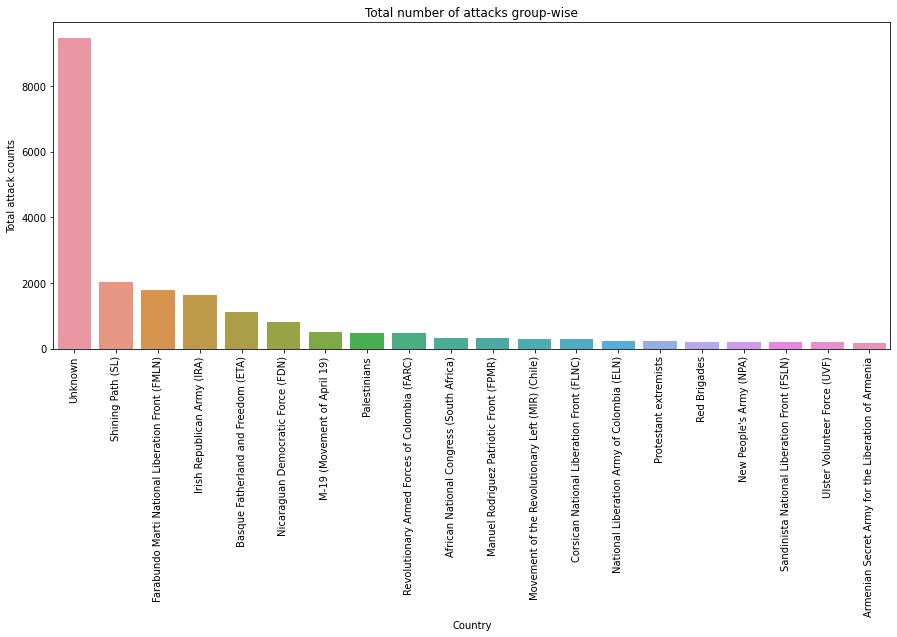

In [83]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['gname'].value_counts()[:20].index,y=df['gname'].value_counts()[:20].values)
plt.xticks(rotation=90)
plt.title('Total number of attacks group-wise')
plt.xlabel('Country')
plt.ylabel('Total attack counts')
plt.show()

There have been large number of Unknown attacks ,wheras second largest attacks were from Irish Republican Army

Maximum people were killed from Argentina

#### Number of Killed in Terrorist Attacks by Countries.

In [84]:
countryData = df.loc[:,'country':'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [85]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt  Afghanistan  Albania  Algeria  ...  Zaire  Zambia  Zimbabwe
nkill               53.0      0.0      0.0  ...    3.0     7.0      69.0

[1 rows x 138 columns]

In [86]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 138 entries, Afghanistan to Zimbabwe
dtypes: float64(138)
memory usage: 1.1+ KB


In [87]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

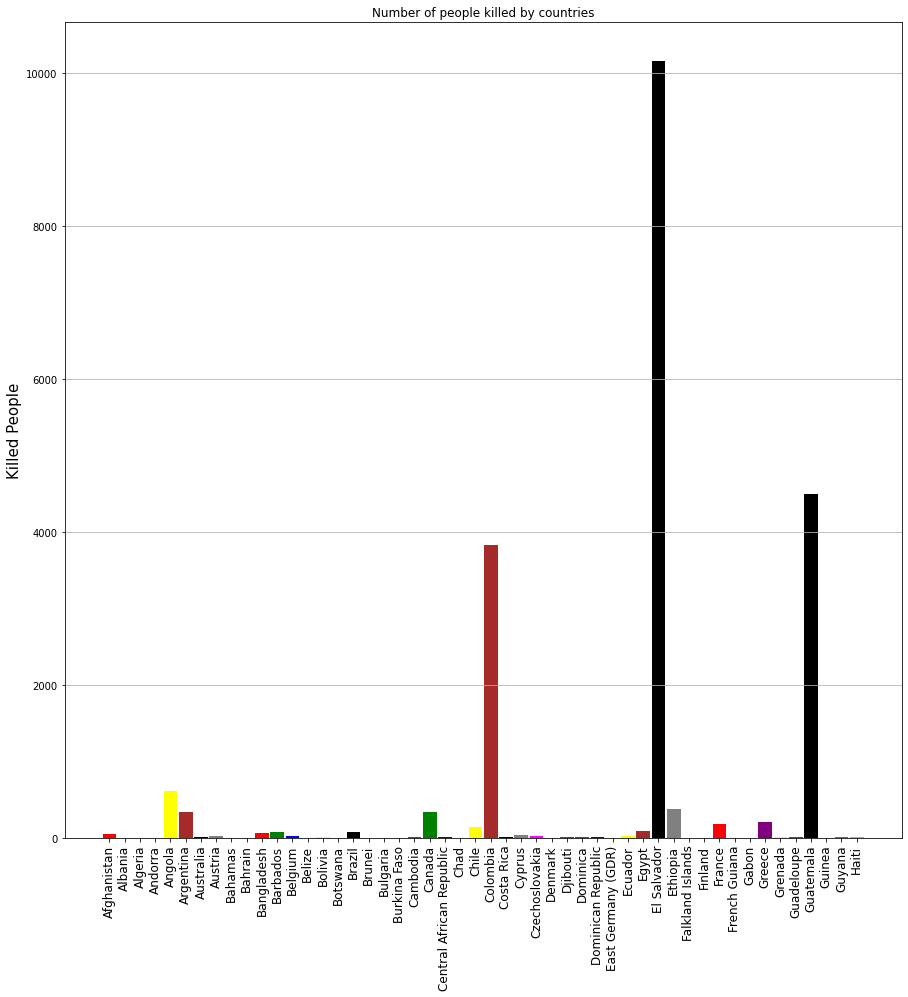

In [106]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=10
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()


El Salvador has highest killed people

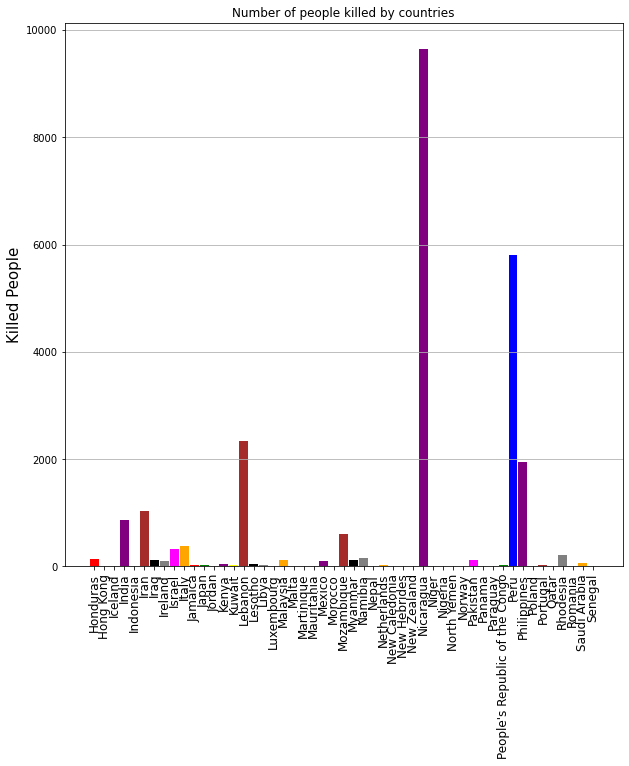

In [107]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=10
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

Nicaragua was also highly affected due to the terrorism

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


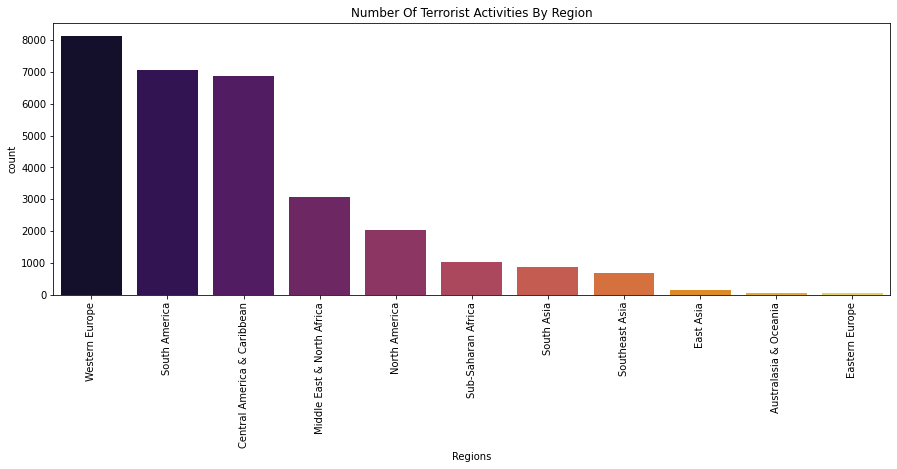

In [90]:
plt.subplots(figsize=(15,5))
sns.countplot('region_txt',data=df,palette='inferno',order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

Western Europe and North Africa are the highly affected regions 

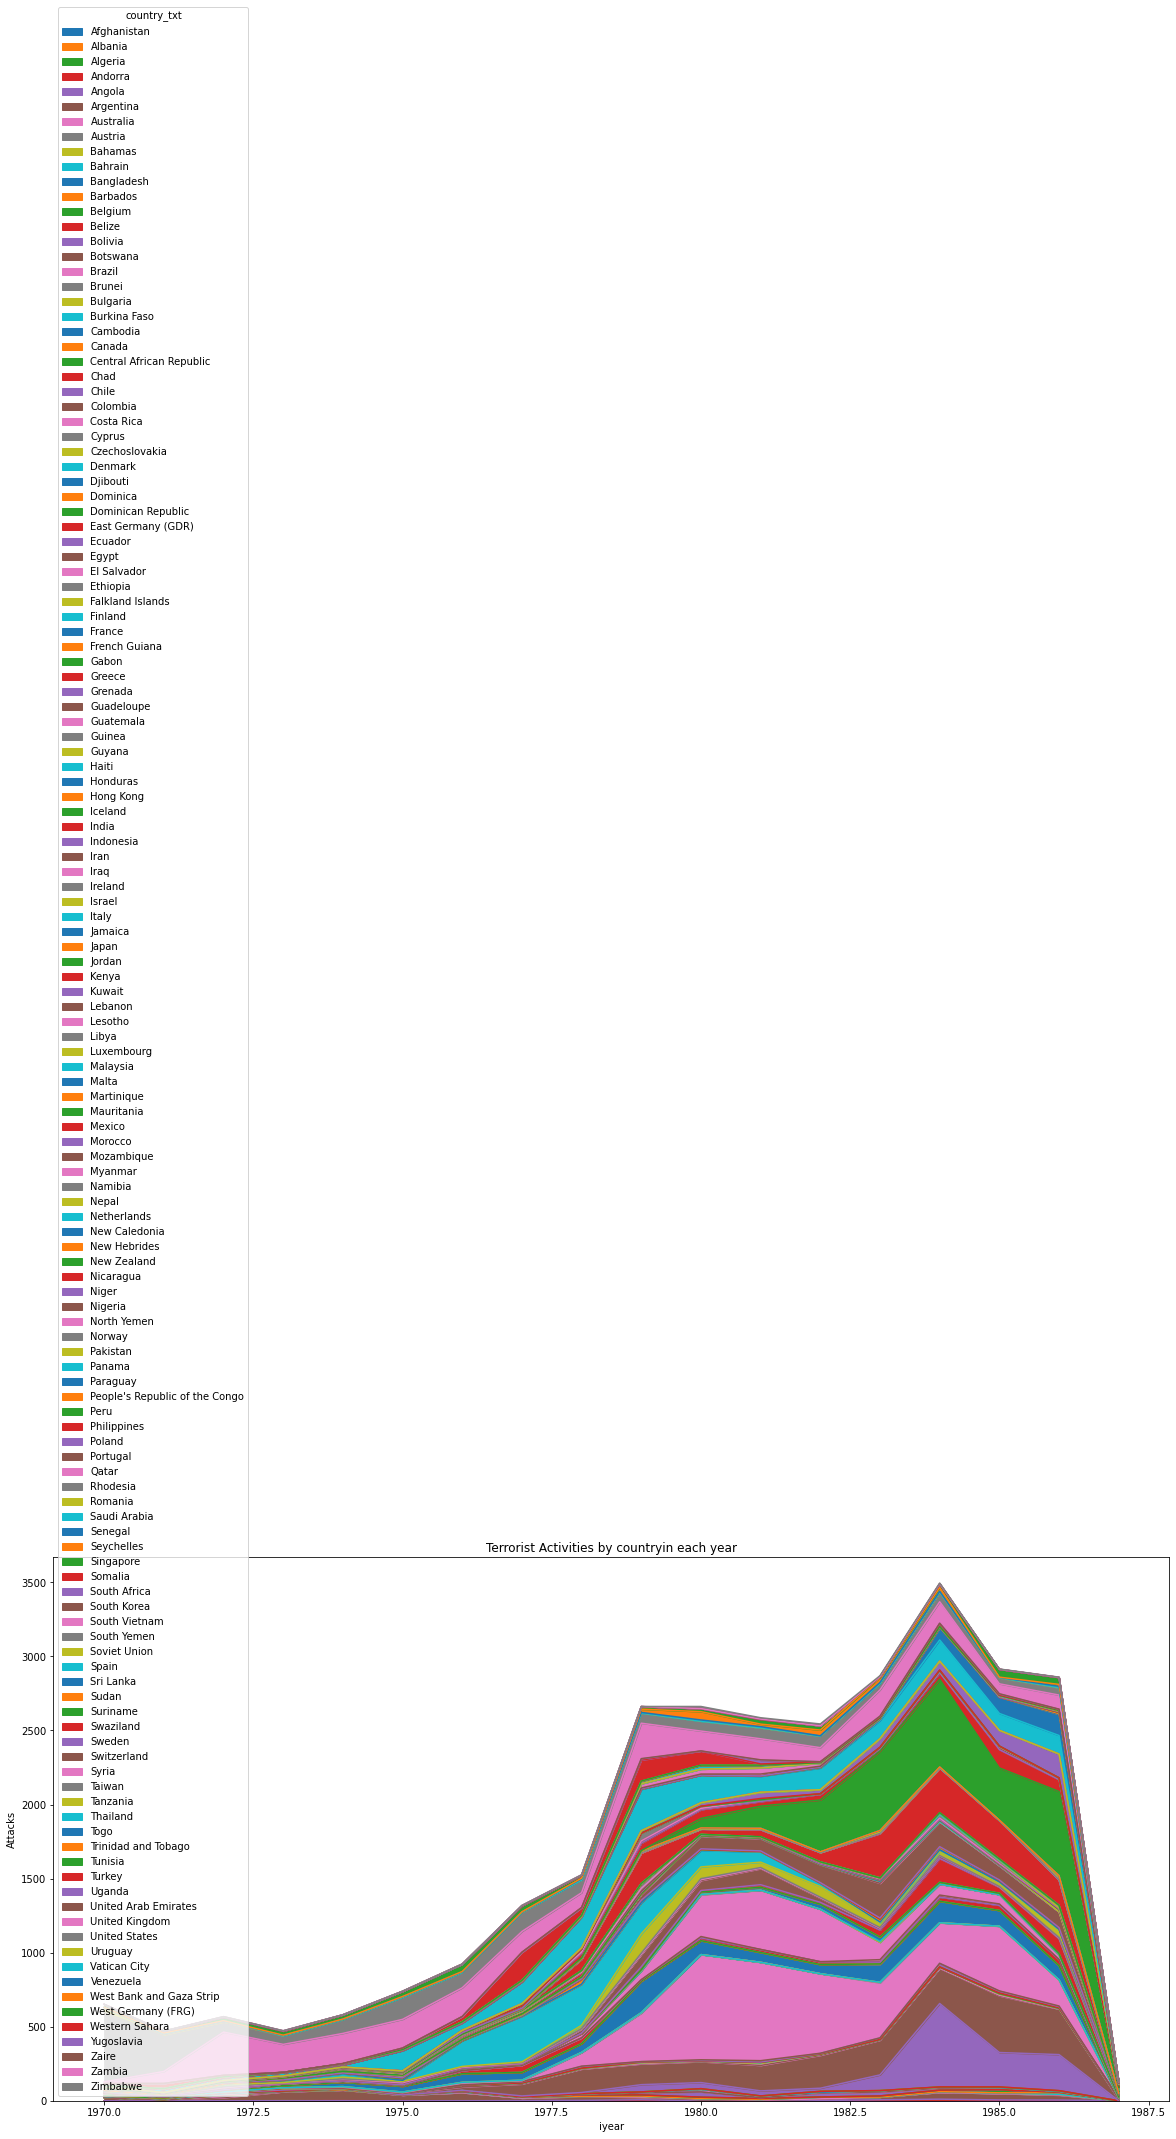

In [91]:
df_region=pd.crosstab(df.iyear,df.country_txt).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities by countryin each year')
plt.ylabel('Attacks')
plt.show()

Terrorist Activities by region in each year

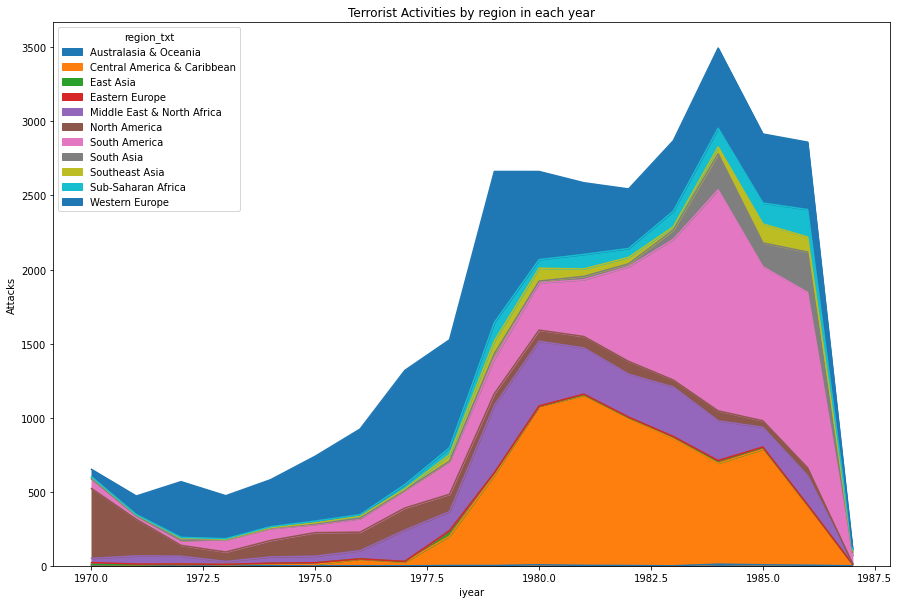

In [109]:
df_region=pd.crosstab(df.iyear,df.region_txt).plot(kind='area',figsize=(15,10))
plt.title('Terrorist Activities by region in each year')
plt.ylabel('Attacks')
plt.show()

In [93]:
filterYear = df['iyear'] == 1970

filterData = df[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map